# Jinlun Zhang 20055835
# Wenqi Tang 20093622
# Eissa Khan 20082302

In [1]:
! pip3 install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 915 kB/s 


In [2]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("H1N1_Flu_Vaccines.csv")
del df['respondent_id'] # as we do not need this feature for leanring
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [3]:
df.shape

(26707, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  chronic_med_condition        25736 non-null  float64
 11  child_under_6_months         25887 non-null  float64
 12  health_worker                25903 non-null  float64
 13  health_insurance

In [5]:
# get the lists of categorical and numeric features
numeric_fea = df.columns[df.dtypes != "object"].values
# separate the target feature from the numeric feature list
numeric_fea = np.delete(numeric_fea, np.argwhere(numeric_fea=="h1n1_vaccine"))

categorical_fea = df.columns[df.dtypes == 'object'].values

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children,h1n1_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26458.000000,26458.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,0.886499,0.534583,0.212454
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


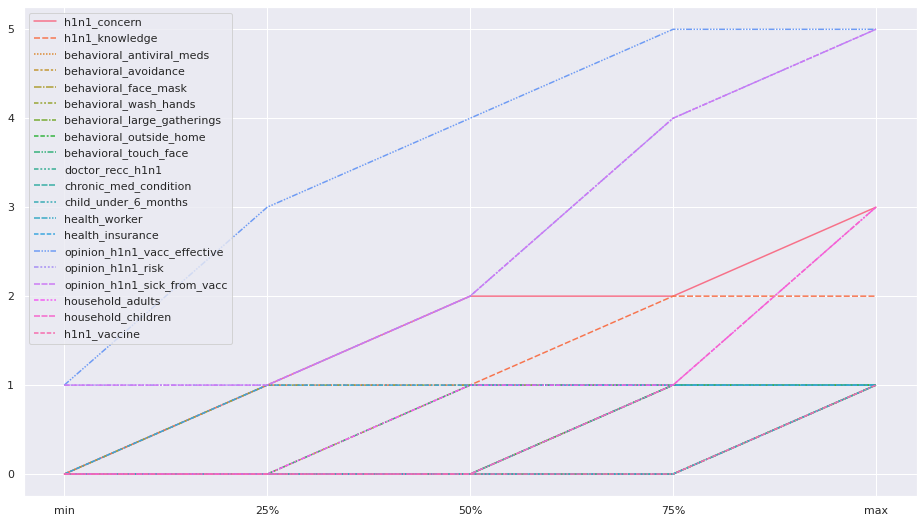

In [6]:
# Explore the numeric features distribution

sns.set(rc={'figure.figsize':(16,9)})
sns.lineplot(data= df.describe()[3:8])
df.describe()

# Data Cleaning & Missing Value Handling 

In [7]:
# remove possible duplicate records (records that have all features values being the same) in the dataset
df = df.drop_duplicates()

In [8]:
# checking the missing values in features
df.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
hhs_geo_region                     0
census_msa                         0
h

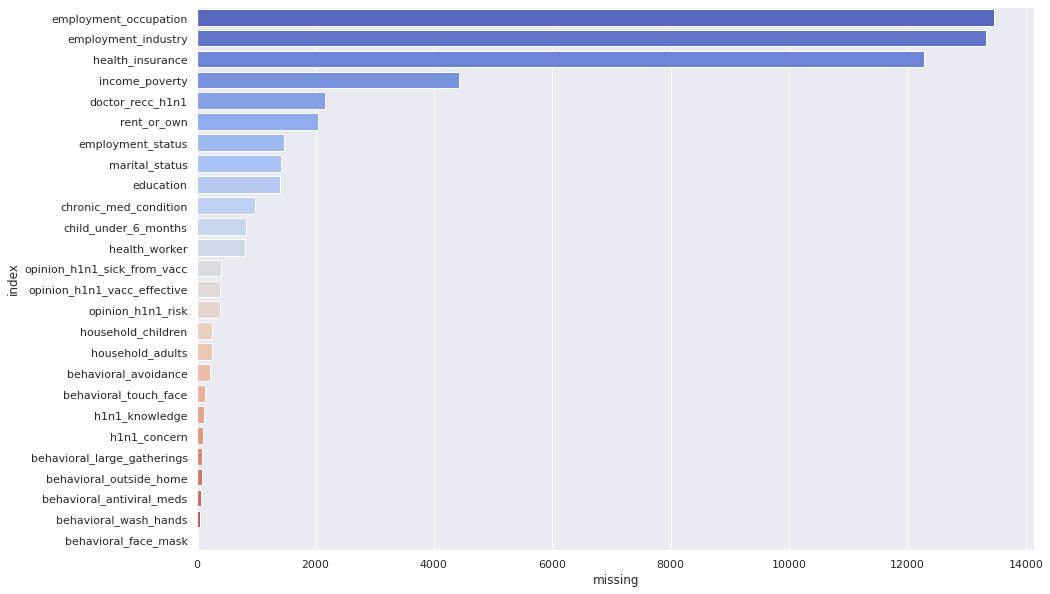

In [9]:
# Plot the missing value count as a bar chart
missing = df.isnull().sum()
missing = missing[missing>0]

miss = pd.DataFrame(missing, columns=['missing'])

miss = miss.reset_index()

#print(miss.columns)

miss.sort_values(by='missing', ascending=False, inplace=True)

plt.figure(figsize=(15, 10))
sns.barplot(y = miss['index'], x= miss.missing, palette='coolwarm')

In [10]:
# Checking the % of the missing values in each feature of the training dataset to determine which feature may have too much missing values that may lead any imputation method to produces poor outcome
# display the features with more than 20% missing values

for col in df.columns:
  percent_missing = float(df[col].isnull().sum() / df.shape[0] ) * 100
  if(percent_missing >= 20):
        print(col, percent_missing,"%" )

health_insurance 45.959709428592824 %
employment_industry 49.91013255448214 %
employment_occupation 50.434359320003 %


### Though more than 50% of training reocrds have the 'employment_occupation' and 'employment_industry' features missing, we still decide to preserve the features as they may contain important info 

### For example, people working in medical industry such as nurses may choose to not to disclose their employment_occupation or employment_industry

### Thus, the missing values in the featrues are due to certain unobserved predictors, meaning that the missing values are not random and are related to the unobserved input variable, leading us to better keep those features and fill in the missing values with wisely chosen imputation strategies

### We will use the k-mean imputor to fill in the missing values to avoid overrepresented values. To do so, we have to convert the categorical features into numeric features first

In [11]:
# We start from the 'age_group' feature
# For this feature, which has 5 unique categorical values, we can convert this categorical feature into numeric one by replacing those age ranges with the middle age for each age range: 

df.age_group.value_counts()

65+ Years        6842
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

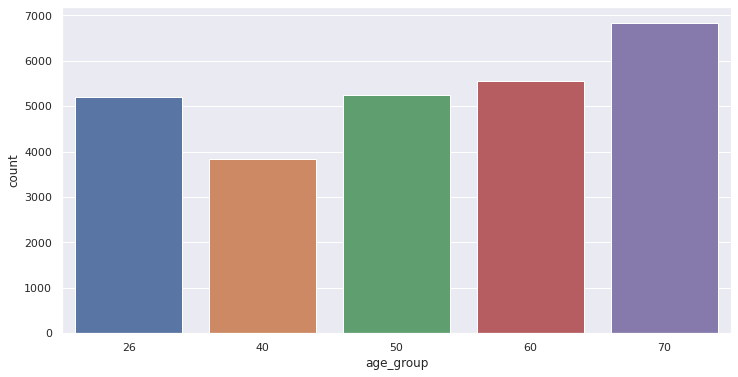

In [12]:
df.age_group = df.age_group.replace({ '18 - 34 Years': 26,
                          '35 - 44 Years': 40,
                          '45 - 54 Years': 50,
                          '55 - 64 Years': 60,
                          '65+ Years': 70, })
plt.figure(figsize=(12,6))
sns.countplot(x="age_group", data = df)

plt.show()

### Convert the categorical feature "education" into numeric one

This feature should be considered as a ordinal categorical feature, so we will give a encoding strategy to reflect the importance of education

> < 12 Years:           1

> 12 Years:            2

> Some College:        3

> College Graduate:    4




In [13]:
df.education.value_counts()

College Graduate    10097
Some College         7043
12 Years             5796
< 12 Years           2363
Name: education, dtype: int64

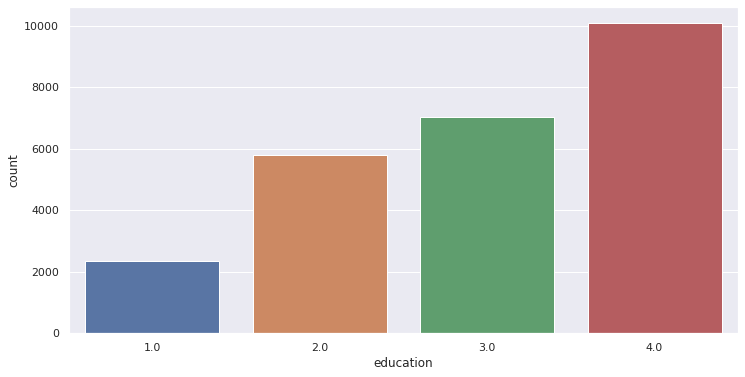

In [14]:
df.education = df.education.replace({ '< 12 Years': 1,
                          '12 Years': 2,
                          'Some College': 3,
                          'College Graduate': 4, })
plt.figure(figsize=(12,6))
sns.countplot(x="education", data = df)

plt.show()


### Convert the categorical feature "income_poverty" into numeric one

This feature should be considered as a ordinal categorical feature, so we will give a encoding strategy to reflect the income

> Below Poverty:           1

> <= $75,000, Above Poverty:            2

> \> $75,000:        3



In [15]:
df.income_poverty.value_counts()

<= $75,000, Above Poverty    12776
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

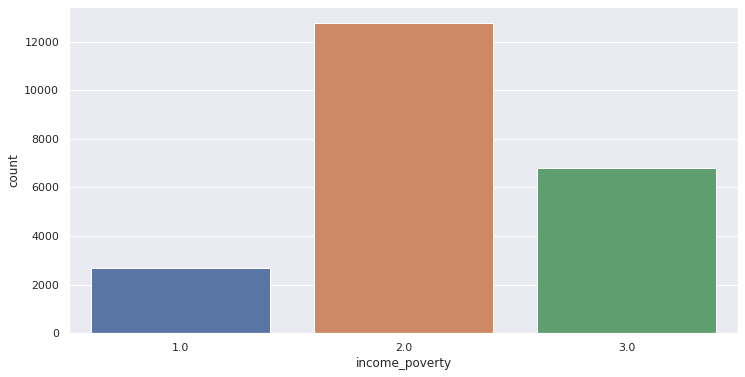

In [16]:
df.income_poverty = df.income_poverty.replace({ 'Below Poverty': 1,
                                      '<= $75,000, Above Poverty': 2,
                                      '> $75,000':3 })
plt.figure(figsize=(12,6))
sns.countplot(x="income_poverty", data = df)

plt.show()

              

## Convert 'Race' feature into numeric one by using the one-hot technique

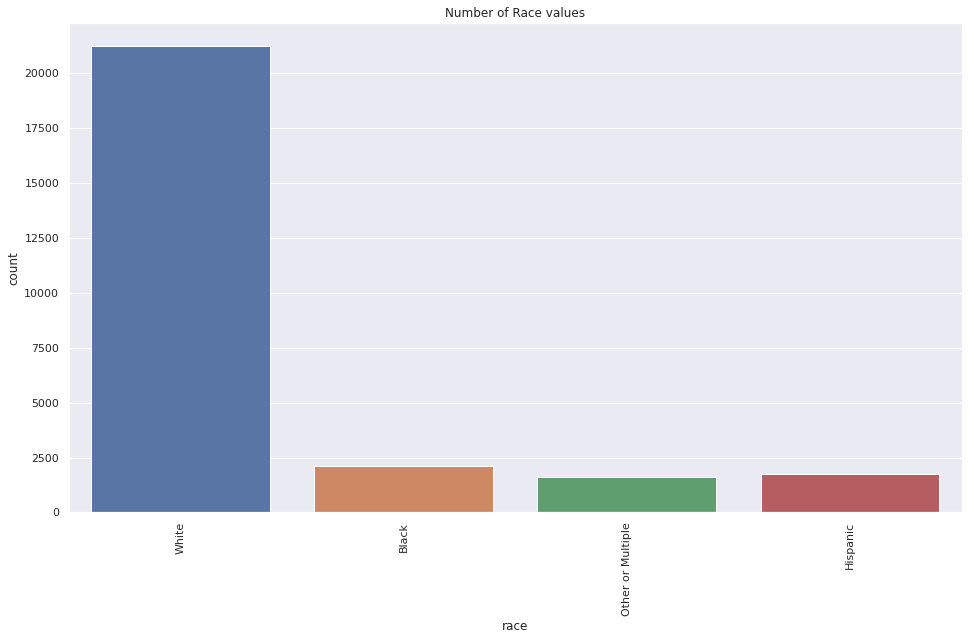

White                21221
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64


In [17]:
sns.countplot(x=df.race, data = df)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()


print(df.race.value_counts())

In [18]:
dummies_race_train = pd.get_dummies(df['race'],prefix='race')
dummies_race_test = pd.get_dummies(df['race'],prefix='race')
dummies_race_train

,race_Black,race_Hispanic,race_Other or Multiple,race_White
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
26702,0,0,0,1
26703,0,0,0,1
26704,0,0,0,1
26705,0,1,0,0


In [19]:
df = pd.concat([df, dummies_race_train], axis=1)      
df = df.drop(['race'], axis=1)
df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,race_Black,race_Hispanic,race_Other or Multiple,race_White
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Non-MSA,0.0,0.0,NaN,NaN,0,0,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,0,0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0,0,0,1
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,"MSA, Principle City",0.0,0.0,NaN,NaN,0,0,0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Non-MSA,0.0,0.0,NaN,NaN,0,0,0,0,1
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0,0,0,1
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0,0,0,1
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0,1,0,0


## Convert the 3 binary categorical features ('sex', 'rent_or_own', 'marital_status') into binary numeric attributes

For 'Gender':

> Male: 1

> Female: 0

For 'rent_or_own':

> rent: 1

> own: 0

For 'marital_status':

> Married: 1

> Not Married: 0

In [20]:
df.sex.value_counts()

Female    15857
Male      10849
Name: sex, dtype: int64

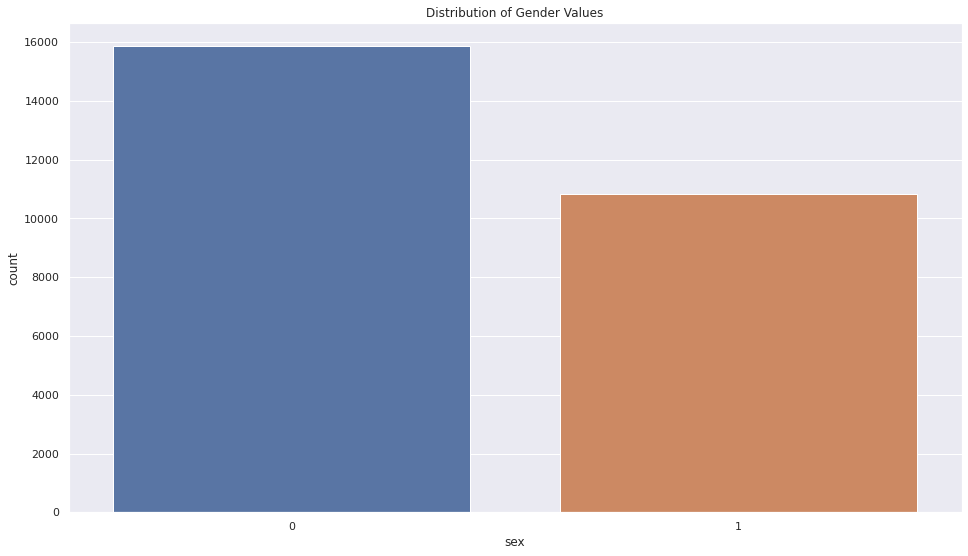

0    15857
1    10849
Name: sex, dtype: int64

In [21]:
df['sex'] = df['sex'].replace({'Male':1, 'Female':0})

sns.countplot(x = "sex", data = df)
plt.title("Distribution of Gender Values")
plt.show()

df.sex.value_counts()

In [22]:
df.rent_or_own.value_counts()

Own     18735
Rent     5929
Name: rent_or_own, dtype: int64

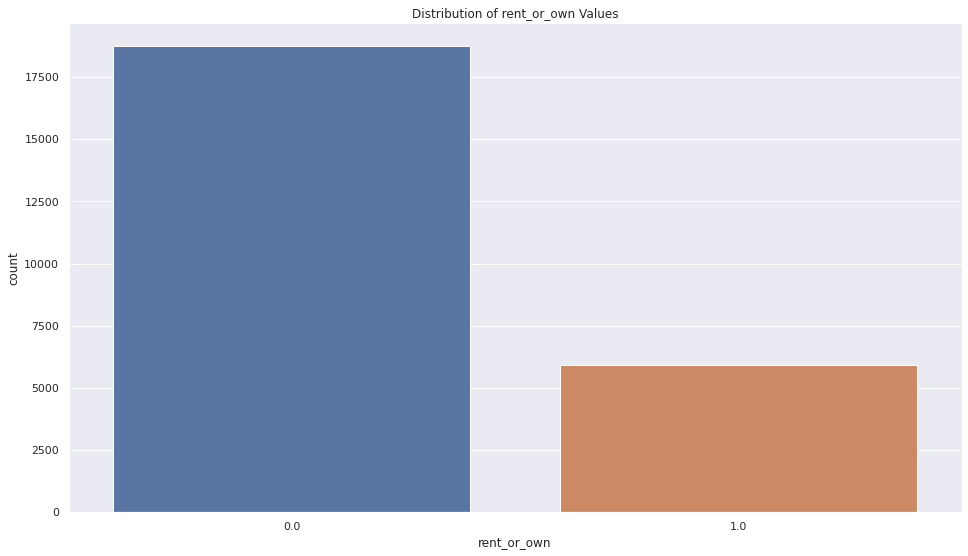

0.0    18735
1.0     5929
Name: rent_or_own, dtype: int64

In [23]:
df['rent_or_own'] = df['rent_or_own'].replace({'Own': 0, 'Rent':1})

sns.countplot(x = "rent_or_own", data = df)
plt.title("Distribution of rent_or_own Values")
plt.show()

df.rent_or_own.value_counts()

In [24]:
df.marital_status.value_counts()

Married        13555
Not Married    11743
Name: marital_status, dtype: int64

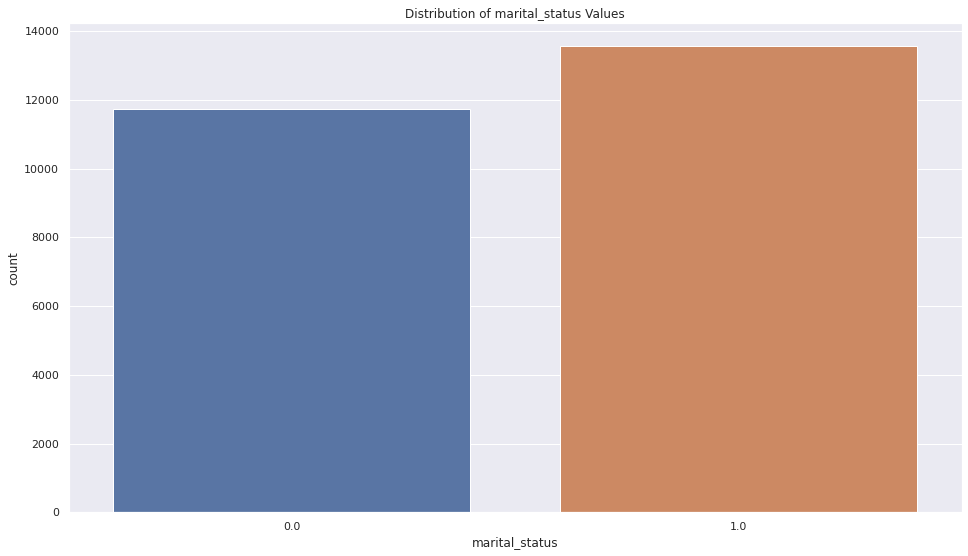

1.0    13555
0.0    11743
Name: marital_status, dtype: int64

In [25]:
df['marital_status'] = df['marital_status'].replace({'Married': 1, 'Not Married':0})

sns.countplot(x = "marital_status", data = df)
plt.title("Distribution of marital_status Values")
plt.show()

df.marital_status.value_counts()

### For the rest of categorical features, we will use the count encoder to transform them into numeric features as most of them have more than 10 unique values in them

### Then, we will get the rank for the values in their corresponding features with using custom code 

In [26]:
import category_encoders
count_encoder = category_encoders.count.CountEncoder(handle_missing = 'return_nan')
# get the remaining categorical features
cats = [c for c in df.columns if df[c].dtypes=='object']

df[cats] = count_encoder.fit_transform(df[cats])
df[cats] 

,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,10230.0,2859.0,7197.0,NaN,NaN
1,13560.0,2846.0,11645.0,1037.0,1082.0
2,13560.0,3102.0,11645.0,523.0,1778.0
3,10230.0,2078.0,7864.0,NaN,NaN
4,13560.0,3102.0,11645.0,1804.0,1270.0
...,...,...,...,...,...
26702,10230.0,3102.0,7197.0,NaN,NaN
26703,13560.0,4297.0,7864.0,2468.0,1247.0
26704,NaN,4297.0,11645.0,NaN,NaN
26705,13560.0,2078.0,7197.0,2468.0,296.0


In [27]:
# Replace the frequency values with their rank in the corresponding features
# this is a coding challenge as there is no existing API or example code demonstrating an effective way of implementing this encoding strategy

for cat in cats:
  map = df[cat].value_counts().rank().to_dict()
  print(map)
  df[cat] = df[cat].replace(map)
df[cats]

{13560.0: 3.0, 10230.0: 2.0, 1453.0: 1.0}
{4297.0: 10.0, 3265.0: 9.0, 3102.0: 8.0, 2859.0: 7.0, 2858.0: 6.0, 2846.0: 5.0, 2243.0: 4.0, 2078.0: 3.0, 2032.0: 2.0, 1126.0: 1.0}
{11645.0: 3.0, 7864.0: 2.0, 7197.0: 1.0}
{2468.0: 21.0, 1804.0: 20.0, 1231.0: 19.0, 1037.0: 18.0, 926.0: 17.0, 871.0: 16.0, 851.0: 15.0, 614.0: 14.0, 527.0: 13.0, 523.0: 12.0, 511.0: 11.0, 338.0: 10.0, 325.0: 9.0, 286.0: 8.0, 275.0: 7.0, 215.0: 6.0, 201.0: 5.0, 148.0: 4.0, 124.0: 3.0, 89.0: 2.0, 13.0: 1.0}
{1778.0: 23.0, 1509.0: 22.0, 1270.0: 21.0, 1247.0: 20.0, 1082.0: 19.0, 766.0: 18.0, 548.0: 17.0, 485.0: 16.0, 469.0: 15.0, 452.0: 14.0, 388.0: 13.0, 372.0: 12.0, 354.0: 11.0, 344.0: 10.0, 341.0: 9.0, 331.0: 8.0, 296.0: 7.0, 276.0: 6.0, 248.0: 5.0, 227.0: 4.0, 208.0: 3.0, 148.0: 2.0, 98.0: 1.0}


,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,2.0,7.0,1.0,NaN,NaN
1,3.0,5.0,3.0,18.0,19.0
2,3.0,8.0,3.0,12.0,23.0
3,2.0,3.0,2.0,NaN,NaN
4,3.0,8.0,3.0,20.0,21.0
...,...,...,...,...,...
26702,2.0,8.0,1.0,NaN,NaN
26703,3.0,10.0,2.0,21.0,20.0
26704,NaN,10.0,3.0,NaN,NaN
26705,3.0,3.0,1.0,21.0,7.0


In [28]:
df[cats].isnull().sum()

employment_status         1463
hhs_geo_region               0
census_msa                   0
employment_industry      13329
employment_occupation    13469
dtype: int64

### Now, we can use the KNN imputer to fill in all the missing values

In [29]:
from sklearn.impute import KNNImputer
imputer = KNNImputer( n_neighbors=3)
imputer.fit(df)


KNNImputer(n_neighbors=3)

In [30]:
df[:] = imputer.transform(df)
df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,race_Black,race_Hispanic,race_Other or Multiple,race_White
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,...,1.0,0.0,0.0,13.000000,22.000000,0.0,0.0,0.0,0.0,1.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,0.0,...,3.0,0.0,0.0,18.000000,19.000000,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,3.0,2.0,0.0,12.000000,23.000000,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.0,...,2.0,0.0,0.0,18.666667,16.666667,0.0,0.0,0.0,0.0,1.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,0.0,...,3.0,1.0,0.0,20.000000,21.000000,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,...,1.0,0.0,0.0,17.333333,21.666667,0.0,0.0,0.0,0.0,1.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,...,2.0,1.0,0.0,21.000000,20.000000,0.0,0.0,0.0,0.0,1.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,0.0,...,3.0,0.0,0.0,14.666667,16.666667,0.0,0.0,0.0,0.0,1.0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,...,1.0,1.0,0.0,21.000000,7.000000,0.0,0.0,1.0,0.0,0.0


In [31]:
# check if we still have missing value
df.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
age_group                      0
education                      0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
employment_industry            0
employment_occupation          0
h1n1_vacci

# EDA (Data visualization)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


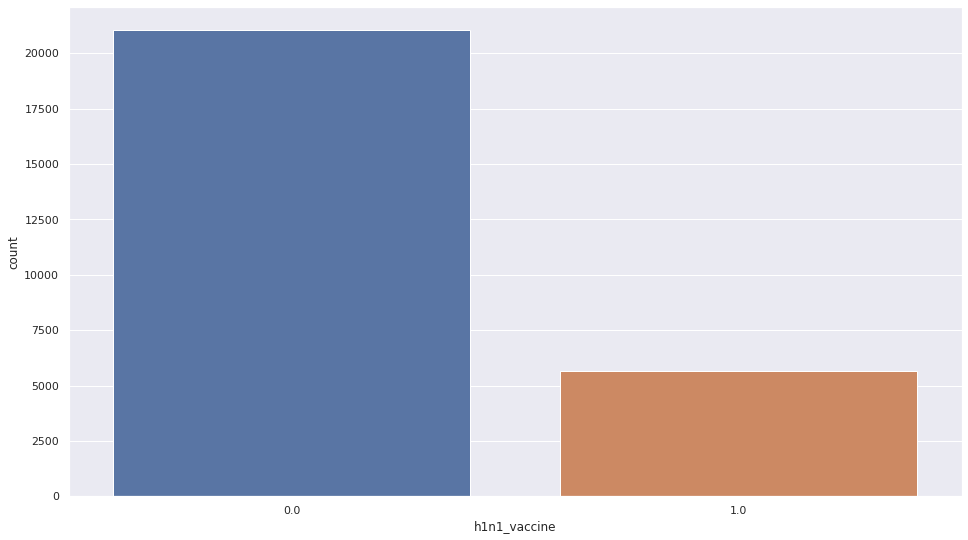

In [32]:
#sns.set(rc={'figure.figsize':(16,9)})
sns.countplot(df['h1n1_vaccine'])

# The target attribute value is moderately imbalanced, with majority of records belonging to class 0 (not received the vaccine) 
# Hence, the ideal model evaluation metrics we should choose for this task should be f1 or AUC or both 

In [33]:
# describe categorical columns
df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,race_Black,race_Hispanic,race_Other or Multiple,race_White
count,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,...,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000
mean,1.618213,1.261514,0.048903,0.725130,0.068998,0.825532,0.358758,0.337377,0.676889,0.217017,...,2.166554,0.887928,0.537969,15.597381,16.678112,0.212462,0.079308,0.065716,0.060361,0.794615
std,0.909598,0.617558,0.215437,0.445253,0.253374,0.379310,0.479176,0.472375,0.466899,0.403129,...,0.823298,0.751353,0.926718,4.031126,4.865279,0.409057,0.270224,0.247789,0.238159,0.403990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,13.000000,14.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,1.000000,0.000000,16.000000,17.666667,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,3.000000,1.000000,1.000000,19.000000,20.333333,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,21.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000


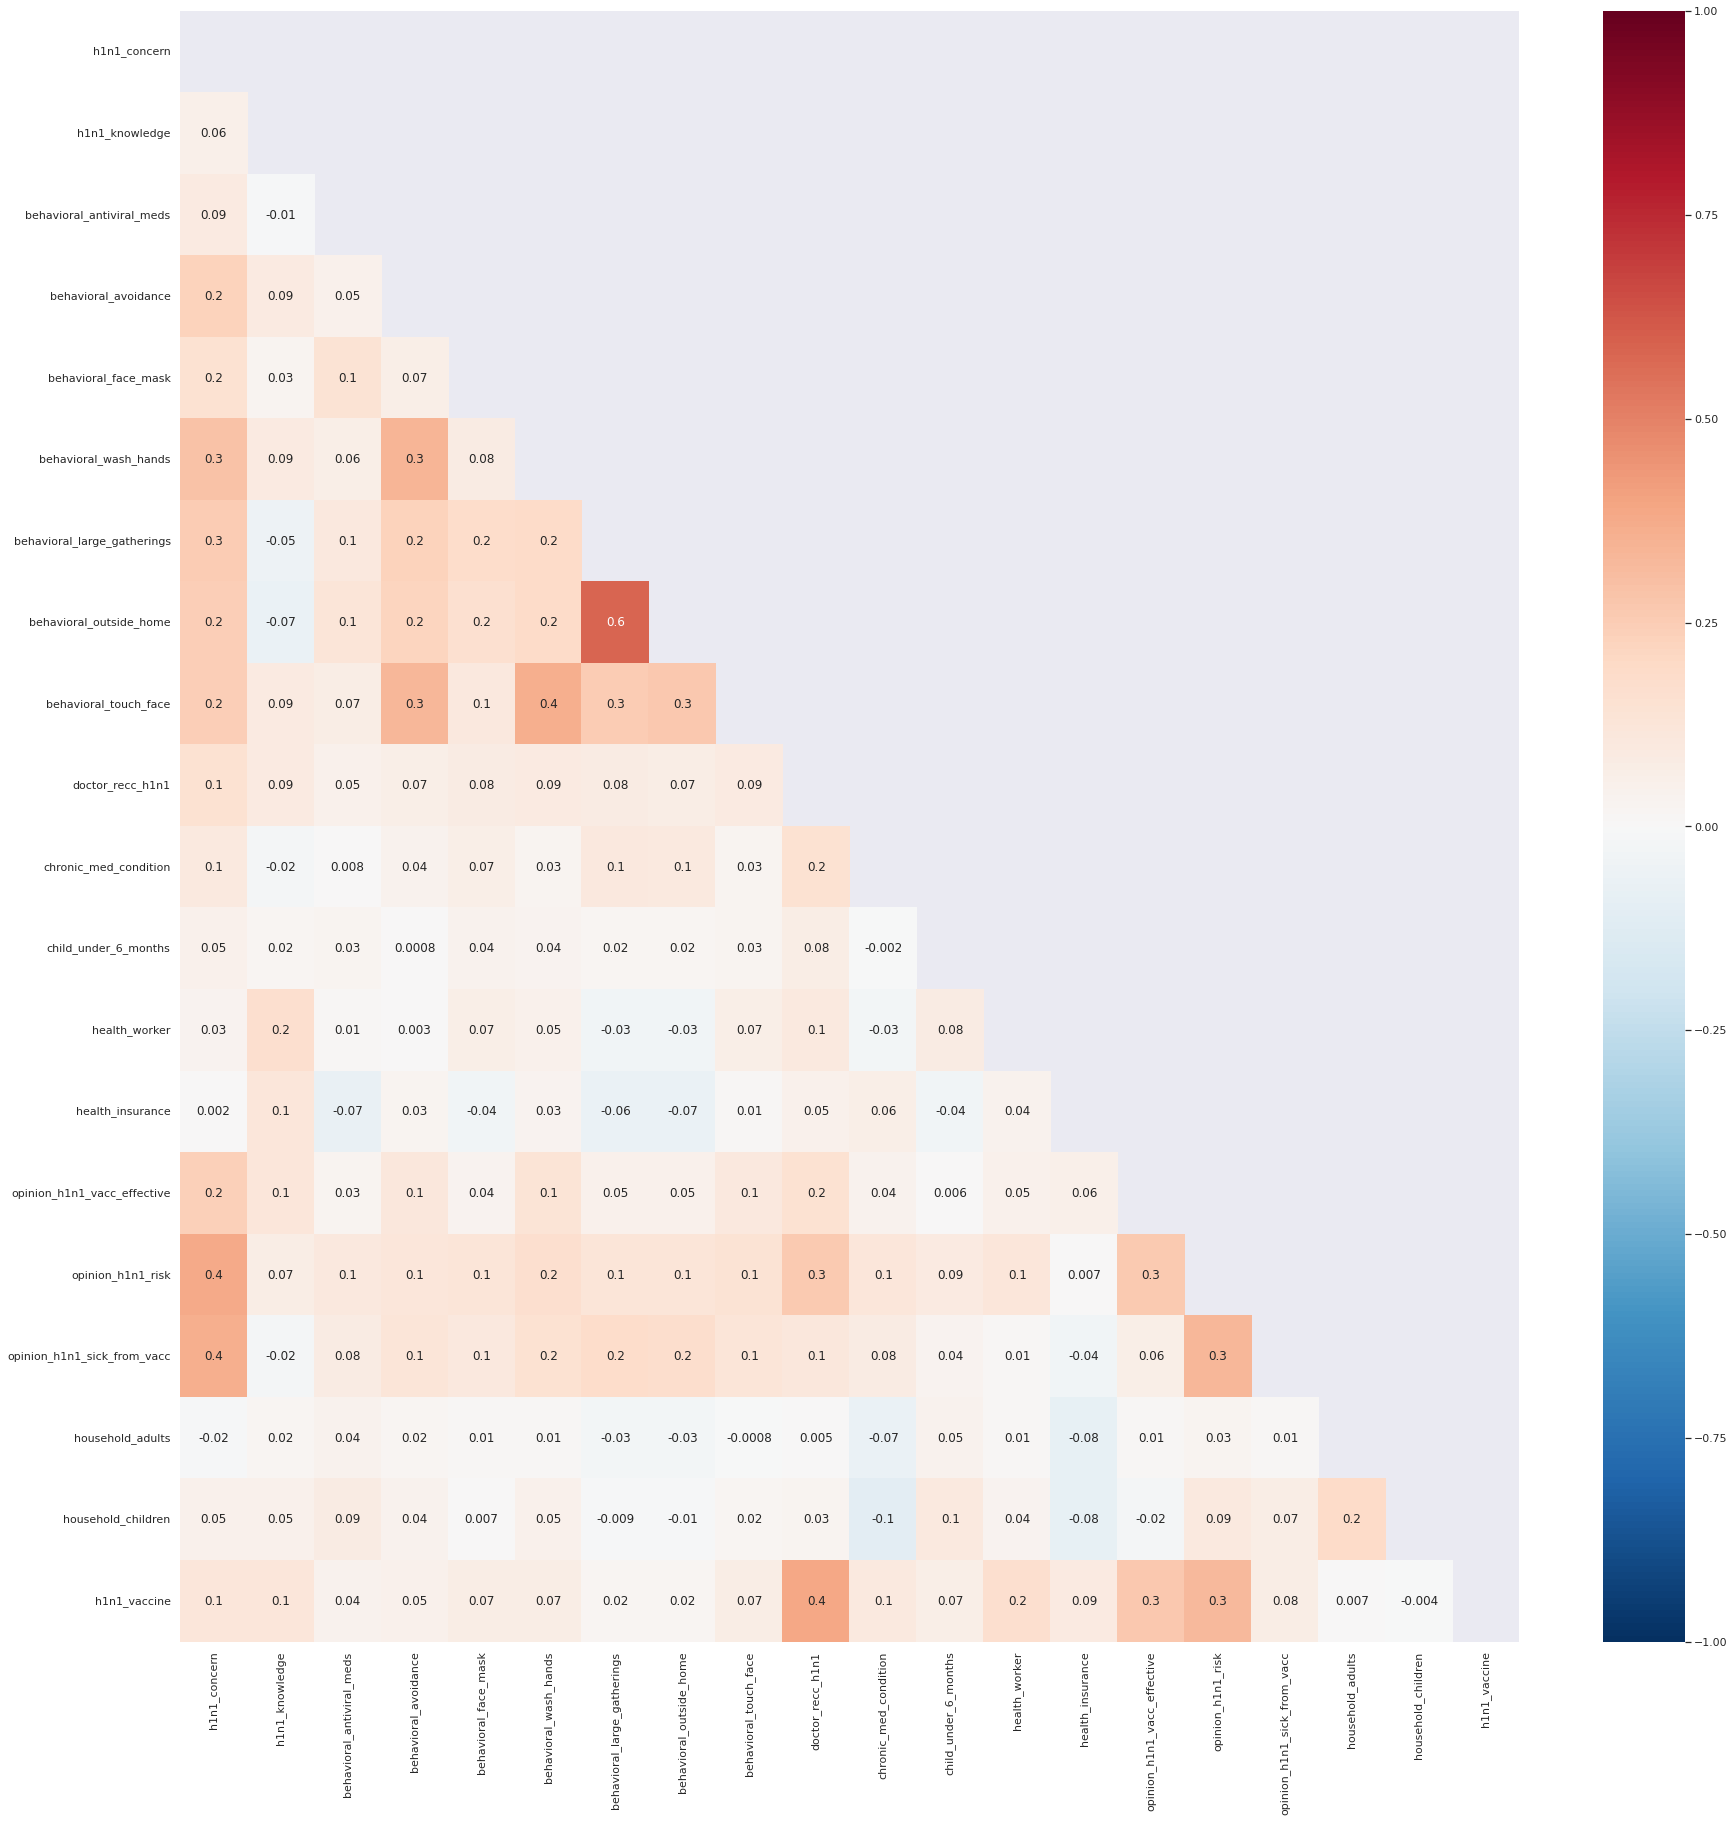

In [34]:
# heatmap of the correlation matrix of all the numeric features 
matrix = np.triu(df[np.append(numeric_fea, "h1n1_vaccine")].corr())
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(df[np.append(numeric_fea, "h1n1_vaccine")].corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

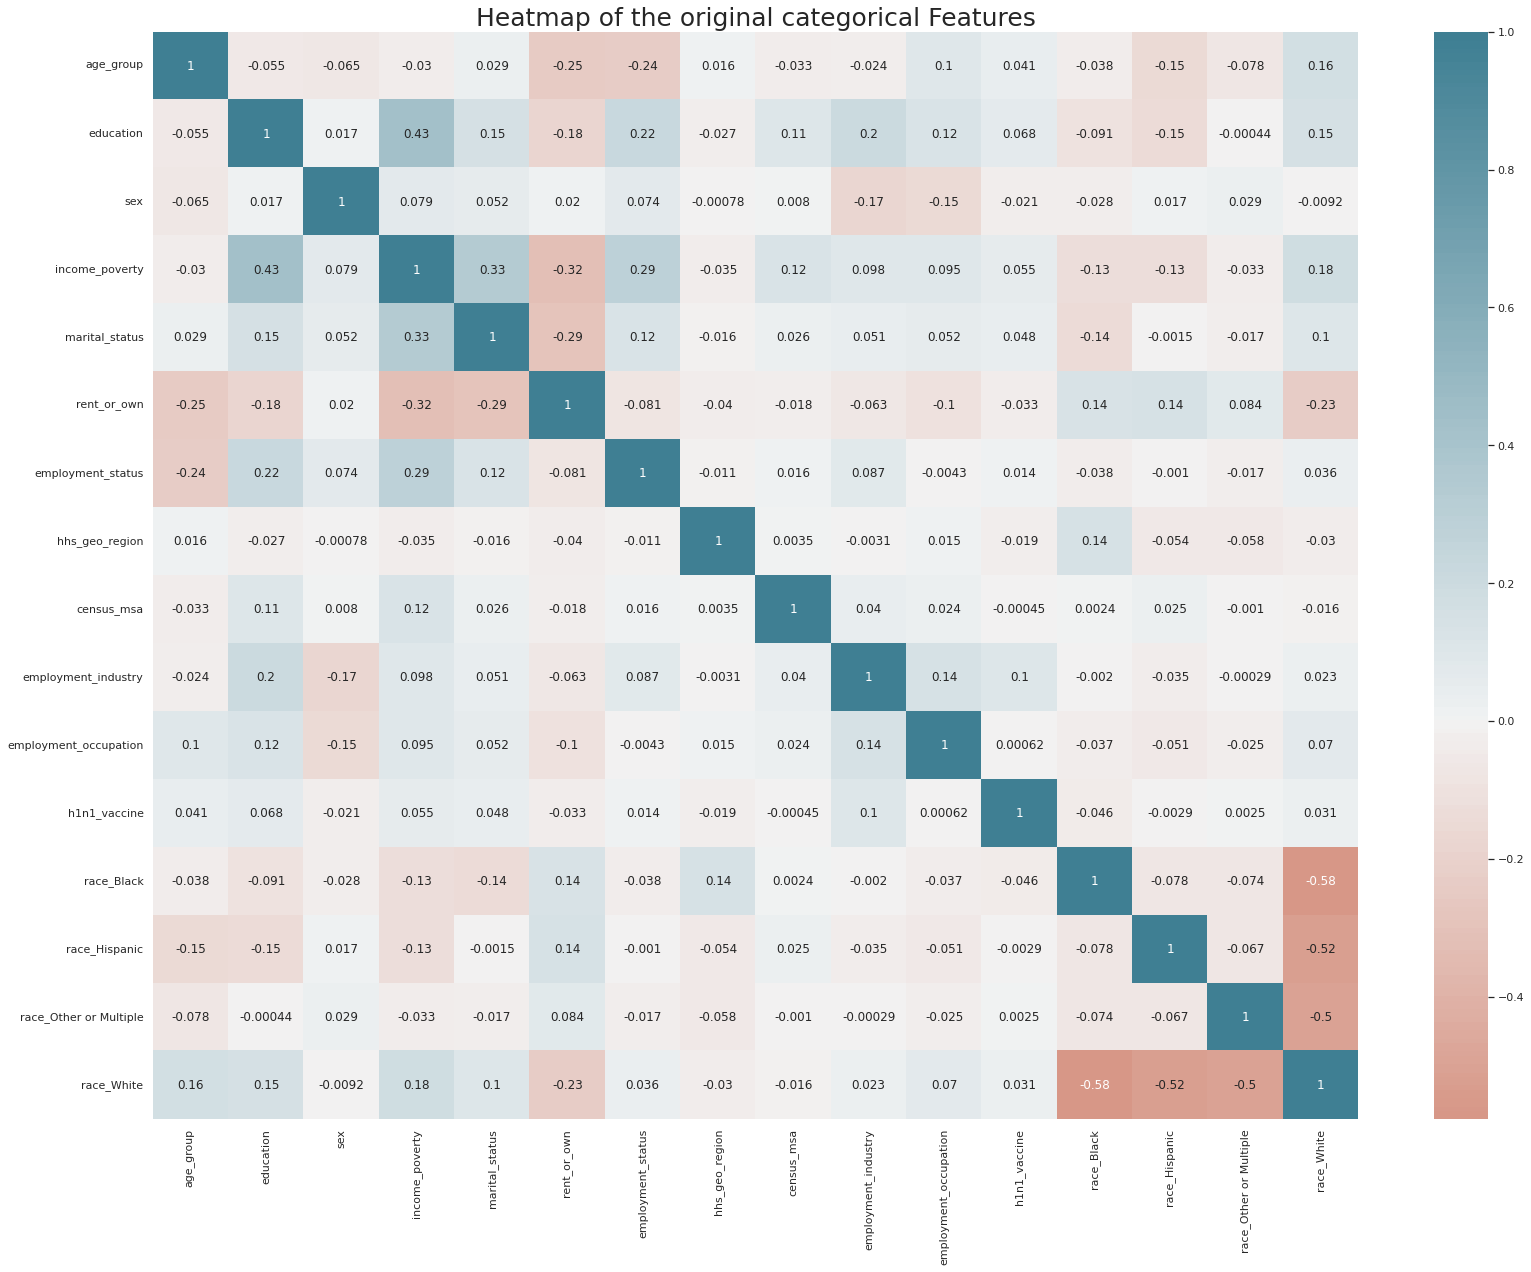

In [35]:
# heatmap of the correlation matrix of all the original categorical features 
import matplotlib.style as style
#style.use('seaborn-dark-palette')
#sns.set_style('darkgrid')
plt.subplots(figsize = (27,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
#mask = np.zeros_like(df.corr(), dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True


sns.heatmap(df.loc[:, ~df.columns.isin(numeric_fea)].corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, center = 0, )
## Give title. 
plt.title("Heatmap of the original categorical Features", fontsize = 25);

# Oversampling the data

In [36]:
nv = df[df['h1n1_vaccine'] < 0.5]
v = df[df['h1n1_vaccine'] > 0.5]
final_df = df.copy()

import random

N = len(v)
M = len(nv)

new_rows = v.sample(M - N, replace=True)
df = pd.concat([df, new_rows], axis=0)
df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,race_Black,race_Hispanic,race_Other or Multiple,race_White
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,13.000000,22.000000,0.0,0.0,0.0,0.0,1.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3.0,0.0,0.0,18.000000,19.000000,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,0.0,12.000000,23.000000,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,0.0,0.0,18.666667,16.666667,0.0,0.0,0.0,0.0,1.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,1.0,0.0,20.000000,21.000000,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,0.0,18.000000,13.000000,1.0,0.0,0.0,0.0,1.0
9196,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,2.0,12.333333,16.333333,1.0,0.0,0.0,0.0,1.0
6356,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,3.0,1.0,0.0,14.000000,15.000000,1.0,0.0,0.0,0.0,1.0
5577,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,3.0,3.0,0.0,21.000000,10.000000,1.0,0.0,1.0,0.0,0.0


# Model Training

In [37]:
# Get the training and validation set
from sklearn.model_selection import train_test_split
# sort the value first to train the tokenizer 

xy_train, xy_validation = train_test_split(df, test_size=0.3) 

y_train = xy_train['h1n1_vaccine']
y_validation = xy_validation['h1n1_vaccine']

x_train = xy_train.drop(['h1n1_vaccine' ], axis=1)
x_validation = xy_validation.drop(['h1n1_vaccine' ], axis=1)



## Train the SVM model first as the baseline model (Jinlun Zhang)
Incentive: Since the number of features in the original dataset is not large, and SVM has fewer hyper-parameters for tuning, this model is simple to implement and requires less training time to give an impression about the complexity of the classification task. Hence, this should be a good candidate for a baseline model. 

Furthermore, SVM can produce good generalizability for binary classification task due to the identified optimal hyperplane (may even outperforms neural networks sometimes),and we can also use the Kernel functions to increase the feature space and make the dataset sparser (Getting a adequate model performance). 


In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
classifier = SVC(         random_state=1, max_iter=5000)


In [39]:
param_svc = { # the range of hyper-parameters we want to search
    'kernel':['linear','poly', 'rbf', 'sigmoid','precomputed'], 
    'gamma': ['auto','scale'],
    'degree': range(1,10), # set degree for poly kernel use only, the default value is 3
    'coef0': range(0,10), #  only used in ‘poly’ and ‘sigmoid’, default value is 0,
    'tol': [1e-4,1e-3], # default value is 1e-3
    'decision_function_shape': ['ovr','ovo'], # default value is 'ovr', and 'ovo' cannot be used when is 'break_ties=True'
#    'classifier__break_ties': [True, False], # This parameter can only be 'True' when decision_function_shape='ovr', so the default value is 'False'. However, tuning this parameter is redundant as 'False' turns out to be the best parameter setting for 'break_ties' 
    'cache_size': [200,300], # Specify the size of the kernel cache size (MB), the default value is 200
}

random_search_svc = RandomizedSearchCV( # pass the model pipeline and the ranges of (hyper-)parameters we want to search as arguments to RandomizedSearchCV()
    classifier, param_svc, cv=2, verbose=3, n_jobs=-1,  # cv=5 means we have 5 folds for the CV, n_jobs = -1 means using all CPU processors
    n_iter=5,random_state=1, 
    scoring='f1_micro') # we choose 'f1_micro' to be our primary scoring

random_search_svc.fit(x_train, y_train)
print('best score {}'.format(random_search_svc.best_score_))

Fitting 2 folds for each of 5 candidates, totalling 10 fits
best score 0.7871892405923109


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [40]:
random_search_svc.best_params_

{'tol': 0.001,
 'kernel': 'rbf',
 'gamma': 'auto',
 'degree': 1,
 'decision_function_shape': 'ovo',
 'coef0': 2,
 'cache_size': 200}

In [41]:
# Run the model on the validation set to see the performance for tuning
from sklearn.metrics import roc_auc_score, f1_score
y_pred_valid = random_search_svc.best_estimator_.predict(x_validation)

print('SVM validation auc: ', roc_auc_score(y_validation, y_pred_valid))
print('SVM validation f1:  ', f1_score(y_validation, y_pred_valid, average='micro'))

SVM validation auc:  0.7569324214179229
SVM validation f1:   0.7565768621236133


## Noteworthy: The f1 and auc scores are only 0.78 and 0.5 when only the count encoding strategy is implemented, meaning we have achieved much better model performance by simply using the count rank encoding strategy, rather than just the count encoding strategy

## Train the MLP (Wenqi Tang)

In [42]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(256,128,64), learning_rate_init=0.01,
                          power_t=0.5, max_iter=5000, shuffle=True, tol=0.0001, 
                          early_stopping=True, validation_fraction=0.1, n_iter_no_change=10,
                         random_state=42)

In [43]:
# import warnings
# warnings.filterwarnings("ignore")

param_mlp = { # the range of hyper-parameters we want to search
    'learning_rate': ['invscaling', 'adaptive'],
    'activation': ['identity', 'logistic', 'tanh'],
    'alpha': np.arange(0.0001, 0.001, 0.0001),
    'learning_rate_init': [1e-2,1e-3], # default value is 1e-3
    'tol' : [1e-4, 1e-3]
}

random_search_mlp = RandomizedSearchCV( # pass the model pipeline and the ranges of (hyper-)parameters we want to search as arguments to RandomizedSearchCV()
    mlp, param_mlp, cv=2, verbose=3, n_jobs=-1,  # cv=5 means we have 5 folds for the CV, n_jobs = -1 means using all CPU processors
    n_iter=5,random_state=1, 
    scoring='f1_micro') # we choose 'f1_micro' to be our primary scoring

random_search_mlp.fit(x_train.values, y_train)
print('best score {}'.format(random_search_mlp.best_score_))

Fitting 2 folds for each of 5 candidates, totalling 10 fits
best score 0.7618190463252276


In [44]:
random_search_mlp.best_params_

{'tol': 0.001,
 'learning_rate_init': 0.01,
 'learning_rate': 'invscaling',
 'alpha': 0.0004,
 'activation': 'logistic'}

In [46]:
# Run the model on the validation set to see the performance for tuning
from sklearn.metrics import roc_auc_score, f1_score
y_pred_valid = random_search_mlp.best_estimator_.predict(x_validation.values)

print('MLP validation auc: ', roc_auc_score(y_validation, y_pred_valid))
print('MLP validation f1:  ', f1_score(y_validation, y_pred_valid, average='micro'))

MLP validation auc:  0.757773264437017
MLP validation f1:   0.7576862123613313


### The MLP performance is better than the baseline model (SVM) performance, especially regarding to the AUC score achieved, which can be attributed to the ANN learning model architecture 

# Train XGBoosting (Eissa Khan)

In [47]:
from xgboost.sklearn import XGBClassifier
est_xgb = XGBClassifier(min_child_weight=2,
                             subsample=0.8,colsample_bytree=0.4,reg_alpha=0.1,objective= 'binary:logistic',nthread=4,
                              scale_pos_weight=1 ,reg_lambda = 10 , random_state = 42)

param_xgb = {
    'learning_rate':np.arange(0,1,0.01), 
    'n_estimators': range(0,1000, 10),
    'max_depth': range(1,10),
    'gamma': np.arange(0.01,0.25, 0.01)
}

random_search_xgb = RandomizedSearchCV( # pass the model pipeline and the ranges of (hyper-)parameters we want to search as arguments to RandomizedSearchCV()
    est_xgb, param_xgb, cv=2, verbose=3, n_jobs=-1,  # cv=5 means we have 5 folds for the CV, n_jobs = -1 means using all CPU processors
    n_iter=5,random_state=1, 
    scoring='f1_micro') # we choose 'f1_micro' to be our primary scoring

random_search_xgb.fit(x_train.values, y_train)
print('best score {}'.format(random_search_xgb.best_score_))

Fitting 2 folds for each of 5 candidates, totalling 10 fits
best score 0.8612960195625594


In [48]:
print(random_search_xgb.best_params_)

{'n_estimators': 630, 'max_depth': 8, 'learning_rate': 0.45, 'gamma': 0.060000000000000005}


In [49]:
y_pred_valid = random_search_xgb.best_estimator_.predict(x_validation.values)

print('XGB validation auc: ', roc_auc_score(y_validation, y_pred_valid))
print('XGB validation f1:  ', f1_score(y_validation, y_pred_valid, average='micro'))

XGB validation auc:  0.9165202470920114
XGB validation f1:   0.9167987321711569


## Ensembling Strategy: Stacking

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import StackingClassifier


In [51]:
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

est_mlp = random_search_mlp.best_estimator_
est_xgb = random_search_xgb.best_estimator_
est_svc = random_search_svc.best_estimator_

est_rn = RandomForestClassifier(max_depth=30, bootstrap=True, n_estimators=200)
est_lgbm = LGBMClassifier(seed=1,  classifier__objective = 'binary', n_estimators = 300, )


estimators_stacked = [
              ('xbg', est_xgb),
              ('svc', est_svc),
              ('rn', est_rn),
              ('mlp',est_mlp),
              ('lgbm',est_lgbm)
             ]

stacked_estimator =  StackingClassifier(estimators=estimators_stacked,
                                    final_estimator= LogisticRegression(),
                                    #cv = 'prefit',
                                    #passthrough = True,
                                    
                                  )


In [52]:
import warnings
warnings.filterwarnings("ignore")
stacked_estimator.fit(x_train.values, y_train)

StackingClassifier(estimators=[('xbg',
                                XGBClassifier(colsample_bytree=0.4,
                                              gamma=0.060000000000000005,
                                              learning_rate=0.45, max_depth=8,
                                              min_child_weight=2,
                                              n_estimators=630, nthread=4,
                                              random_state=42, reg_alpha=0.1,
                                              reg_lambda=10, subsample=0.8)),
                               ('svc',
                                SVC(coef0=2, decision_function_shape='ovo',
                                    degree=1, gamma='auto', max_iter=5000,
                                    random_state=1)),
                               ('rn',
                                Rando...ax_depth=30,
                                                       n_estimators=200)),
                               ('

In [53]:
y_pred_valid = stacked_estimator.predict(x_validation.values)

print('Stacking validation auc: ', roc_auc_score(y_validation, y_pred_valid))
print('Stacking validation f1:  ', f1_score(y_validation, y_pred_valid, average='micro'))

Stacking validation auc:  0.9516660687316205
Stacking validation f1:   0.9516640253565769


## Stacking: With comparable performance to the MLP model, this ensembling methond only yields a better prediction result than the one obtained by the baseline model (SVM), which may be attributed to the lack of tuning on the stacking ensembling strategy itself (for example, we can tune the final estimator to be other more sophisticated models like XGboosting) or the infeasibility of the stacking method due to the nature of this task (so other ensembling method like  may produce a better outcome)

# Contribution
### **Jinlun Zhang**: Responsible for most of the code works such as data pre-processing (convert all the features into numeric, implement the count rank encoding strategy), data cleaning (Filling the missing values)), EDA (correlation heatmap, missing value graph), training of the baseline model, SVM, and implementing the stacking ensembling method

### **Wenqi Tang**: Responsible for some of data pre-processing, EDA, and the training of the MLP model

### **Eissa Khan**: Responsible for oversampling due to class imblance, hyperparamter optimization of XGBoost, and the training of the XGBoost model with best parameters for XGB in stacked model